## 파이토치
* 딥러닝 라이브러리가 아니였음
* numpy는 gpu에 안올라감
* 딥러닝이랑 잘 맞아서 딥러닝 라이브러리가 됨
* 텐서 구글 파이 페이스북
* 모든 기업에서 파이토치로 개발함
* 텐서플로 잦은 업데이트와 문법으로 도태 됨
* 동적프로그래밍이 가능함 : 실행 도중에 변수를 바꾸거나 새로운 입력 넣기가 가능함 (텐서플러1.0에선 불가)
* 파이썬의 주요한 환경을 그대로 사용가능 함
* 파이토치는 cuda 빠른 연산이 가능하다
* 빠른 라이브러리 업데이트됨
* 자동화됨 - 미분을 생각안해도 미분을 자동으로 해줌
* 텐서라는 변수를 사용 함
* 파이썬의 array나 list는 gpu 못올라가지만 텐서는 가능
* 텐서들은 앞에 torch를 붙임 (자동으로 잡아줌)

In [1]:
import numpy as np
import torch

In [2]:
mps_device = torch.device("mps")

In [3]:
data_list = [1, 2, 3]
data_array = np.array([1, 2, 3])
data_tensor = torch.tensor([1, 2, 3])

print(type(data_list))   ## 데이터 타입이 다르다
print(type(data_array))
print(type(data_tensor))

<class 'list'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [4]:
data_tensor = torch.tensor([1, 2, 3])    ## int
print(data_tensor.dtype)

data_tensor = torch.tensor([1., 2., 3.,]) ## float
print(data_tensor.dtype)

torch.int64
torch.float32


In [5]:
float_tensor = torch.tensor([1, 2, 3], dtype = torch.float64)
print(float_tensor.dtype)

int_tensor = torch.tensor([1.1, 2.2, 3.8,], dtype = torch.int)
print(int_tensor.dtype)
print(int_tensor)

torch.float64
torch.int32
tensor([1, 2, 3], dtype=torch.int32)


In [6]:
convert_tensor = float_tensor.to(dtype = torch.float32)
print(convert_tensor.dtype)

torch.float32


In [7]:
gpu_tensor = torch.tensor([1, 2, 3], dtype = torch.float32)

In [8]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(Myself, self).__init__() ## 필수항목 super는 부모 초기화, 필요한 네트워크 정의, 변수 정의)

    def forward(self, x): ## 값이 들어오면 x로 처리하면 된다. 

        return 0

## 파이토치 모델
* 모델(network) 구성과 관련된 것 torch.nn에 들어 있음
* linear reg~ 도 네트워크임
* nn.Linear(1,1) 앞이 input size, 뒤가 output size

In [9]:
import torch
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.l1 = nn.Linear(1,1)

    def forward(self, x):
        out = self.l1(x)

        return out

model = MyModel() ## 두번쨰 forward 실행 됨

hours = torch.FloatTensor([2, 3, 4, 5, 6, 7])    ##[배치, 데이터크기] 배치 -> 메모리에 몇개 씩 올리는지 
print(hours.shape)
hours = hours.view(-1, 1)  ## [6,1] 올려줘야 함  reshape -> view로 사용하면 됨 
print(hours.shape)

print(model(hours)) ## w,b 설정안해도 초기화해서 랜덤으로 들어가서 출력함

torch.Size([6])
torch.Size([6, 1])
tensor([[-0.6173],
        [-1.0686],
        [-1.5199],
        [-1.9712],
        [-2.4225],
        [-2.8738]], grad_fn=<AddmmBackward0>)


In [10]:
import torch.optim as optim
criterion = nn.MSELoss()  ## (x-y)^2의 평균
optimizer = optim.SGD(model.parameters(), lr = 0.01) ## parameter 학습시켜야 할 대상(w,b) (SGD -> Sto ~~ 원래는 다 넣고(-1, 1로 나오면 loss가 없는 것 처럼 보임), 데이터 섞어가면서 나눠서함), 기본보다 frequent 모델 파라미터를 업데이트, 메모리 덜 먹음, 데이터가 많아도 나눠서 하기 떄문에 시간이 덜걸림

In [11]:
h = np.array([2, 3, 4, 5, 6, 7])
s = np.array([25, 49, 42, 57, 72, 68])

hours = torch.FloatTensor(h).view(-1,1)
score = torch.FloatTensor(s).view(-1,1)

num_epochs = 10000

for epoch in range(num_epochs):
    outputs = model(hours)

    optimizer.zero_grad()
    loss = criterion(outputs, score)
    loss.backward()
    optimizer.step()

    if(epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1} / {num_epochs}], Loss: {loss.item():.4f}')

Epoch [100 / 10000], Loss: 50.1376
Epoch [200 / 10000], Loss: 46.3443
Epoch [300 / 10000], Loss: 44.0106
Epoch [400 / 10000], Loss: 42.5749
Epoch [500 / 10000], Loss: 41.6916
Epoch [600 / 10000], Loss: 41.1482
Epoch [700 / 10000], Loss: 40.8139
Epoch [800 / 10000], Loss: 40.6082
Epoch [900 / 10000], Loss: 40.4817
Epoch [1000 / 10000], Loss: 40.4038
Epoch [1100 / 10000], Loss: 40.3559
Epoch [1200 / 10000], Loss: 40.3265
Epoch [1300 / 10000], Loss: 40.3083
Epoch [1400 / 10000], Loss: 40.2972
Epoch [1500 / 10000], Loss: 40.2903
Epoch [1600 / 10000], Loss: 40.2861
Epoch [1700 / 10000], Loss: 40.2835
Epoch [1800 / 10000], Loss: 40.2819
Epoch [1900 / 10000], Loss: 40.2809
Epoch [2000 / 10000], Loss: 40.2803
Epoch [2100 / 10000], Loss: 40.2800
Epoch [2200 / 10000], Loss: 40.2797
Epoch [2300 / 10000], Loss: 40.2796
Epoch [2400 / 10000], Loss: 40.2795
Epoch [2500 / 10000], Loss: 40.2795
Epoch [2600 / 10000], Loss: 40.2794
Epoch [2700 / 10000], Loss: 40.2794
Epoch [2800 / 10000], Loss: 40.2794
E

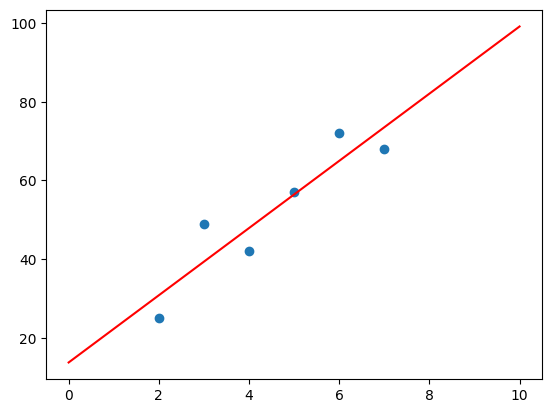

In [12]:
import matplotlib.pyplot as plt

plt.plot(h, s, 'o')

x = torch.linspace(0, 10, 10)
predict = model(x.view(-1, 1))
predict = predict.detach().numpy() ## detach -> 원래 자동미분기가 있는데 없애고 텐서로 바꾸고 돌림
plt.plot(x.numpy(), predict, 'r')

plt.show()

In [13]:
import torch
import torch.nn as nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.l1 = nn.Linear(1,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        return out

model = MyModel() ## 두번쨰 forward 실행 됨

hours = torch.FloatTensor([10, 7, 5, 4]).view(-1,1)    ##[배치, 데이터크기] 배치 -> 메모리에 몇개 씩 올리는지 

print(model(hours)) ## w,b 설정안해도 초기화해서 랜덤으로 들어가서 출력함

tensor([[0.9810],
        [0.9552],
        [0.9219],
        [0.8979]], grad_fn=<SigmoidBackward0>)


In [14]:
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
h = np.array([10, 7, 5, 4])
s = np.array([1, 1, 0, 0])
hours = torch.FloatTensor(h).view(-1,1)
score = torch.FloatTensor(s).view(-1,1)
num_epochs = 20000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(hours)
    loss = criterion(outputs, score)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/20000], Loss: 0.6792
Epoch [200/20000], Loss: 0.5904
Epoch [300/20000], Loss: 0.5210
Epoch [400/20000], Loss: 0.4662
Epoch [500/20000], Loss: 0.4225
Epoch [600/20000], Loss: 0.3869
Epoch [700/20000], Loss: 0.3576
Epoch [800/20000], Loss: 0.3330
Epoch [900/20000], Loss: 0.3122
Epoch [1000/20000], Loss: 0.2942
Epoch [1100/20000], Loss: 0.2786
Epoch [1200/20000], Loss: 0.2648
Epoch [1300/20000], Loss: 0.2526
Epoch [1400/20000], Loss: 0.2417
Epoch [1500/20000], Loss: 0.2318
Epoch [1600/20000], Loss: 0.2229
Epoch [1700/20000], Loss: 0.2147
Epoch [1800/20000], Loss: 0.2072
Epoch [1900/20000], Loss: 0.2003
Epoch [2000/20000], Loss: 0.1939
Epoch [2100/20000], Loss: 0.1880
Epoch [2200/20000], Loss: 0.1824
Epoch [2300/20000], Loss: 0.1773
Epoch [2400/20000], Loss: 0.1724
Epoch [2500/20000], Loss: 0.1679
Epoch [2600/20000], Loss: 0.1636
Epoch [2700/20000], Loss: 0.1595
Epoch [2800/20000], Loss: 0.1557
Epoch [2900/20000], Loss: 0.1520
Epoch [3000/20000], Loss: 0.1486
Epoch [3100/20000],

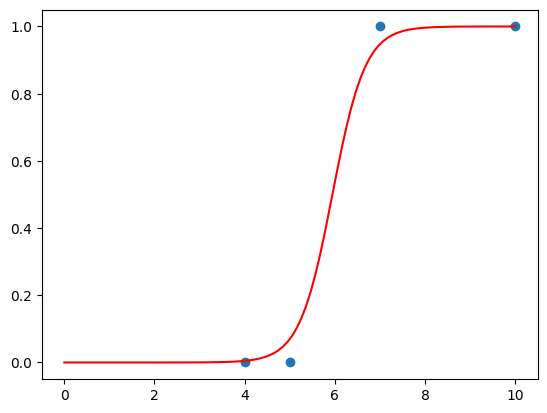

In [15]:
# evaluation
import matplotlib.pyplot as plt
model.eval()
plt.plot(h, s, 'o')
x = torch.linspace(0, 10, 100)
predict = model(x.view(-1,1))
predict = predict.detach().numpy()
plt.plot(x.numpy(), predict, 'r')
plt.show()

In [16]:
## F 공부하기

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class XOR_Model(nn.Module):
    def __init__(self):
        super(XOR_Model, self).__init__()
        self.l1 = nn.Linear(2, 8)
        self.l2 = nn.Linear(8, 4)
        self.l3 = nn.Linear(4, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.activation(out)
        out = self.activation(self.l2(out))
        out = F.sigmoid(self.l3(out))
        return out

model = XOR_Model() ## 두번쨰 forward 실행 됨

In [18]:
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])
x_t = torch.FloatTensor(x).view(x.shape[0],-1)
y_t = torch.FloatTensor(y).view(x.shape[0],1)


num_epochs = 20000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_t)
    loss = criterion(outputs, y_t)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
predict = model(x_t)
print(predict)

Epoch [100/20000], Loss: 0.6935
Epoch [200/20000], Loss: 0.6935
Epoch [300/20000], Loss: 0.6935
Epoch [400/20000], Loss: 0.6934
Epoch [500/20000], Loss: 0.6934
Epoch [600/20000], Loss: 0.6934
Epoch [700/20000], Loss: 0.6934
Epoch [800/20000], Loss: 0.6934
Epoch [900/20000], Loss: 0.6934
Epoch [1000/20000], Loss: 0.6934
Epoch [1100/20000], Loss: 0.6934
Epoch [1200/20000], Loss: 0.6933
Epoch [1300/20000], Loss: 0.6933
Epoch [1400/20000], Loss: 0.6933
Epoch [1500/20000], Loss: 0.6933
Epoch [1600/20000], Loss: 0.6933
Epoch [1700/20000], Loss: 0.6933
Epoch [1800/20000], Loss: 0.6933
Epoch [1900/20000], Loss: 0.6933
Epoch [2000/20000], Loss: 0.6933
Epoch [2100/20000], Loss: 0.6933
Epoch [2200/20000], Loss: 0.6932
Epoch [2300/20000], Loss: 0.6932
Epoch [2400/20000], Loss: 0.6932
Epoch [2500/20000], Loss: 0.6932
Epoch [2600/20000], Loss: 0.6932
Epoch [2700/20000], Loss: 0.6932
Epoch [2800/20000], Loss: 0.6932
Epoch [2900/20000], Loss: 0.6932
Epoch [3000/20000], Loss: 0.6932
Epoch [3100/20000],